In [ ]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import comb
from itertools import combinations, permutations
from apyori import apriori as apr
from mlxtend.frequent_patterns import apriori, association_rules
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
df = pd.read_csv("book.csv")

In [ ]:
df.head()

In [ ]:
df1 = df.copy()

In [ ]:
df1.describe().T

In [ ]:
df1.isnull().sum()

In [ ]:
df1.dtypes

In [ ]:
df1.shape

In [ ]:
item_sets = {}

In [ ]:
te = TransactionEncoder()

In [ ]:
te_ary = te.fit(df1).transform(df1)

In [ ]:
ap = pd.DataFrame(te_ary, columns=te.columns_)

In [ ]:
ap.sum().to_frame('Frequency').sort_values('Frequency',ascending=False)[:25].plot(kind='bar',
                                                                                  figsize=(12,8),
                                                                                 title="Frequent Items")
plt.show()

In [ ]:
                                # Apriori algorithm
ap_0_5 = {}
ap_1 = {}
ap_5 = {}
ap_1_0 = {}

In [ ]:
confidence = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [ ]:
def gen_rules(df,confidence,support):
    ap = {}
    for i in confidence:
        ap_i =apriori(df1,support,True)
        rule= association_rules(ap_i,min_threshold=i)
        ap[i] = len(rule.antecedents)
    return pd.Series(ap).to_frame("Support: %s"%support)

In [ ]:
confs = []

In [ ]:
for i in [0.001,0.005,0.01,0.05,0.1]:
    ap_i = gen_rules(ap,confidence=confidence,support=i)
    confs.append(ap_i)

In [ ]:
all_conf = pd.concat(confs,axis=1)

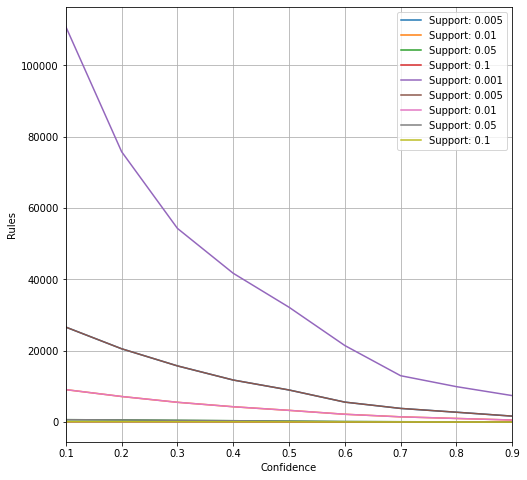

In [ ]:
all_conf.plot(figsize=(8,8),grid=True)
plt.ylabel('Rules')
plt.xlabel('Confidence')
plt.show()

In [ ]:
ap_final =  apriori(ap,0.001,True)

In [ ]:
rules_final = association_rules(ap_final,min_threshold=.4,support_only=False)

In [ ]:
rules_final[rules_final['confidence'] > 0.5]

In [ ]:
support = rules_final["support"]
confidence =  rules_final["confidence"]
lift = rules_final["lift"]

In [ ]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support,confidence,lift)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

In [ ]:
plt.scatter(support,confidence, c =lift, cmap = 'gray')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")